## Introduction

Mayflies are insects that spend a year or a couple of years at the bottom of the river then slowly begin to energe from the water to lay eggs. Then they die so onle one generation of mayflies is alive at any time. We can assume that the size of the populations of mayflies in a given year depends only on the size of the populations from the previous year. The variable $x_n$ can denote the size of the population in a year $n$. Thus we can create a growth rate function:
$$
x_n = g(x_{n-1}) \cdot x_{n-1}
$$
Through this report we look to create a model to predict population changes for mayflies and other living beings that are similar to mayflies. 

To create the model, we need to understand our parameters first and foremost. In small populations there is a alck of competition but as the population increases, the competition for resources increases. Thus we can expect growth rate to decrease as well. We can define the growth rate function as $g(x)$, which should be a decreasing function. It can also be assumed that the population can grow only up to some maximal size $M$ and as the size of the population approaches $M$, the growth rate should approach $0$. A linear function satsifying our conditions is the linear function: 
$$
g(x) = a(M - x)
$$
for some $a > 0.$

Substituting our new information with what was above, our new equation becomes:
$$
x_n = a(M - x_{n-1})\cdot x_{n-1}
$$
We can reduce our two parameters $M$ and $a$ even further. If we designate variable $y_n$ to be equal to $\frac{x_n}{M}$. Then we can simplify our equation to: 
$$
My_n = a(M - My_{n-1})\cdot My_{n-1}
$$
Dividing both sides by $M$ and factoring we get:
$$
y_n = aM(1-y_{n-1})\cdot y_{n-1}
$$
Introduce a new parameter $b$ to equal $aM$ and finally we arrive at our population model to model our mayflies:
$$
y_n = b(1-y_{n-1})\cdot y_{n-1}
$$
for some $b \ge 0$.

## Building our model

Using python, we can define a function `mayfly_model` to accuratley portray our mayfly population. As defined above our model's key parameters are $b$, $y_0$, and an integer $N$. Our variable $b$ represents the growth rate of our mayflies and $y_0$ represents our initial population size. 

Adjusting our equation above: 
$$
y_n = b(1-y_{n-1})\cdot y_{n-1}
$$
to: 
$$
y_{n+1} = b(1 - y_n)\cdot y_n
$$
where $y_n$ represents the population in the year $n$. 

Our function takes in three inputs and calculates a list of population sizes over $N$ steps.

In [1]:
def mayfly_model(b,y0,N):
    
    # Create a list that start with the initial population size
    y_list = [y0] 
    for n in range(N):
        y_n = y_list[n]
        
        # Will calculate the next population size based on our current population size
        y_np1 = b*(1-y_n)*y_n
        y_list.append(y_np1)
    
    # After N steps, this returns our population sizes
    return y_list

In [2]:
# We can store the output first, then display what we have stored inorder to reuse our data later on
mayfly_pop = mayfly_model(3, .25, 20)
mayfly_pop[:5]

[0.25, 0.5625, 0.73828125, 0.5796661376953125, 0.7309599195141345]

## Population Visualizations

In order to examine meaningful results, we can create plots to make our stored data easier to examine. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Mayfly population')

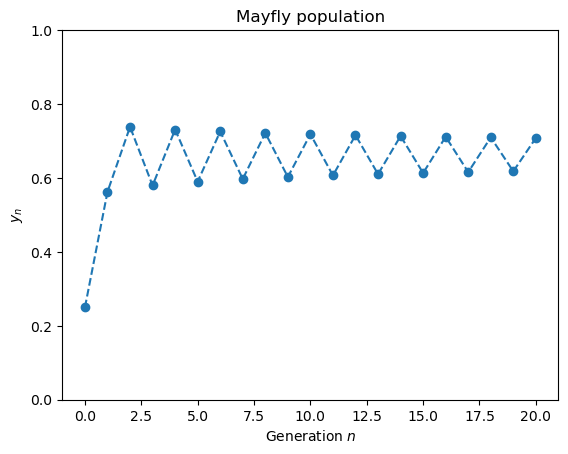

In [4]:
#Stored data from above to make the plot run smoothly
plt.plot(mayfly_pop, 'o--')
plt.ylim(0,1)

#Display title on x-axis
plt.xlabel('Generation $n$')

#Display title on y-axis
plt.ylabel('$y_n$')

#Display title 
plt.title('Mayfly population')

For example, the above plot examine the relationship between $n$ on our x-axis and $y_n$ on our y-axis. As you can see from this graph it appears that intially as $n$ increases then $y_n$ increases. However, as $n$ increases even further, $y_n$ begins to oscillate and the population begins fluctuating. 

The graph above has explored some important topics but has not given us the whole picture yet. Next, we will vary the values of our $b$ parameter to examine how this can affect the population's behavior over time. 

Below we use list comprehsion to generate population data for each pair of $b$ and $y_0$. The `zip` function is a useful function for this task. The function "returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc" [W3Schools](https://www.w3schools.com/python/ref_func_zip.asp). Our `mayfly_model` function is called to return a list of our populations. 

In [5]:
#Number of generations
N = 20

#Different growth rate parameters we want to explore
b_list = [3, 1.5, 2.5]

#Initial Population values that correspond to our b values
y0_list = [.25, .75, .5]

#Includes 20 in the list of integers representing our generations
n_list = np.arange(N+1)

mayfly_pops = [mayfly_model(b,y0,N) for (b,y0) in zip(b_list,y0_list)]

Text(0.5, 1.0, 'Mayfly population')

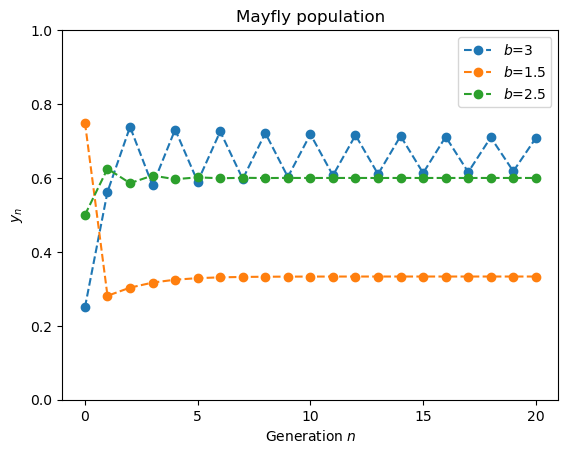

In [6]:
#Loop through b, y0 and their population data
for b,y0, mayfly_pop in zip(b_list,y0_list,mayfly_pops):
    
    #Plots the Mayfly population for each value of b
    plt.plot(n_list, mayfly_pop, 'o--', label='$b$={}'.format(b))
    
plt.legend()

plt.ylim(0,1)

plt.xticks(n_list[::5])

plt.xlabel('Generation $n$')
plt.ylabel('$y_n$')
plt.title('Mayfly population')

This graph above shows how the population of our mayflies evolves depending on the value of our growth paratmer $b$ for three different values of $b$: `[3, 1.5, 2.5]`. 

For our orange line, where $b$ = `1.5`, the population rapidly decreases but after a few generation $n$, the population stabilizes and steadies out. It has reached equilibrium. 

For our green line, where $b$ = `2.5`, the population stabilizes as a mch higher value compared to $b$ = `1.5`. It reaches equilibrium almost right away. 

For our blue line, where $b$ = `3`, the populations increases rapidly and then repeatedly oscillations and doesn't stabilize.

Generally, as $b$ increases, the behavior of the population changes. A smaller value of $b$ leads to stabilization at pretty low population levels compared to a moderate vlaue of $b$ whcih stabilizes at higher population levels. A large value of $b$ creates oscillations in the populations that oscillate between generations. 

Now we want to create a more dynamic function `plot_mayfly_pops` in order to plot mayfly populations for multiple difference growth rate parameters $b$ and initial conditions $y_0$

We can use this function to easily generate plots of mayfly populations for different $b$, $y0$, and $N$ values. This makes it more efficient and easier to examine our plots side by side. 

In [7]:
def plot_mayfly_pops(b_list, y0_list, N, title='Mayfly population'):
    #Creates an array for our generation values
    n_list = np.arange(N+1)
    
    #Similar to above, runs the model for each pair of b and y0 then loop through each pair and their 
    #corresponding data. 
    mayfly_pops = [mayfly_model(b,y0,N) for (b,y0) in zip(b_list, y0_list)]
    for b,y0,mayfly_pop in zip(b_list,y0_list,mayfly_pops):
        plt.plot(n_list, mayfly_pop,'o--',label='$b$={}'.format(b))

    #This adds a legend to identify the different values of each b
    plt.legend()
    plt.ylim(0,1)
    #Displays only every 5 generations to tidy up the graphs
    plt.xticks(n_list[::5])

    plt.xlabel('Generation $n$')
    plt.ylabel('$y_n$')
    plt.title(title)

The code below uses our defined function `plot_mayfly_pops` to create a comparision of mayfly populations given two different $y_0$ (our intitial population values). 

Within the below cell, we use `plt.subplot`. Subplots are another important function fo python that improve the readibility and allow us to compare graphs in one output. The `plt.subplot` function takes three outputs. For example `plt.subplot(1,2,1)` represents that the figure has 1 row, 2 columns and this plot will be in the 1st spot. Here we want to compare two graphs with the same list of growth patterns `b_list = [1,2,3,4]` for two different $y_0$ values (`.1` and `.4`, respectively).

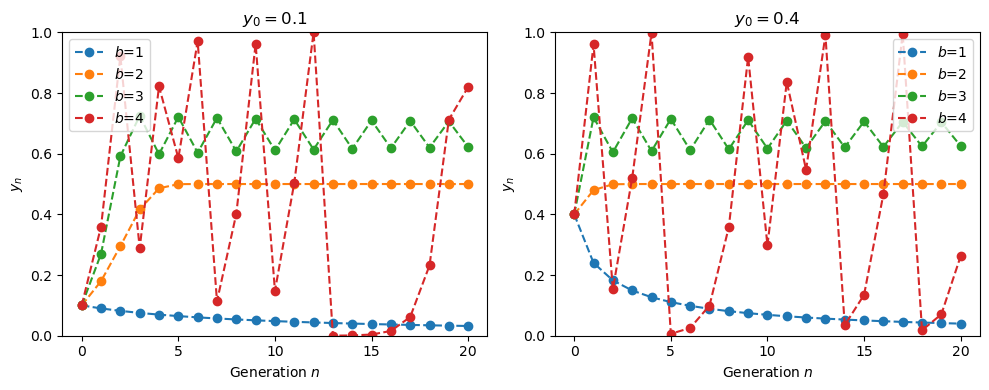

In [8]:
N = 20

#Figure for our plots will be 10 in. by 4 in. 
fig = plt.figure(figsize=(10,4))

#First subplot
plt.subplot(1,2,1)
b_list = [1,2,3,4] #These are our growth parameters to analyze in this figure
y0 = .1 #Sets the initial value to .1 
y0_list = [y0 for b in b_list]
plot_mayfly_pops(b_list, y0_list, N, title='$y_0 = {}$'.format(y0))

#Second subplot
plt.subplot(1,2,2) #1 row, 2 columns, this plot will be in the second spot
b_list = [1,2,3,4]
y0 = .4 #New initial value
y0_list = [y0 for b in b_list]
# We call on our above defined function to plot our mayfly pops.
plot_mayfly_pops(b_list, y0_list, N, title='$y_0 = {}$'.format(y0)) 

#Makes sure that our subplots do no overlap with one another or with their titles
plt.tight_layout()

## Conclusions

There are several things that can be said about mayfly populations and our mayfly model based on different parameters being changed. It can be concluded that if our $b$ growth parameter is greater than one, the population experiences exponential growth, so over time it will increase rapidly. Different values of $b$ impact the populations growth and decline of the mayflies. Clearly, from the above graphs you can see that $b$ is the primary driver that controls populations. A lower level of $b$ leads to stability and but as $b$ gets highers, oscillations in the populations appear and it gets a bit out of control. Also, $y_0$ plays a small role. Initially the graphs look different because of the different $y_0$ values but you can see that the long-term behavior of these graphs is ultimatley influenced by $b$. However, when $b$ is highest ($b$ = `4`) you can see that the intitial condition does affect and it is sensitive to this change.   

Increasing $b$ shows to us that new bahvior can be exhibited and higher values of $b$ represent sensitivity to small changes (e.g chnages to our initial conditions) in the long-run. 

## Sources

https://en.wikipedia.org/wiki/Mayfly
https://www.w3schools.com/python/ref_func_zip.asp
https://www.w3schools.com/python/matplotlib_subplot.asp